## 📦 1. Import Required Libraries

Import TensorFlow, Keras components, and other helper libraries needed for data handling, model building, and visualization.

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## ⚙️ 2. Define Network Parameters

Set up constants for image dimensions, number of classes, and model hyperparameters.

In [ ]:
#Network parameters

NUM_CLASSES = 10

#Reshape 28x28 pixel images to a 'flatter' array of 784 pixels

RESHAPED = 784

#Number of neurons in a hidder layer
HIDDEN_NEURONS = 256

IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

## 👗 3. Load and Preprocess the Fashion MNIST Dataset

We use the Fashion MNIST dataset, which contains 28×28 grayscale images of clothing items in 10 categories. The images are reshaped and normalized to the range [0, 1].


In [ ]:
fashion_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS, 1)

train_images, test_images = train_images/255.0, test_images/255.0

## 🖼️ 4. Visualize the Dataset

We plot 36 random training images along with their class names to get a visual understanding of the dataset. A label dictionary maps class indices to human-readable class names.


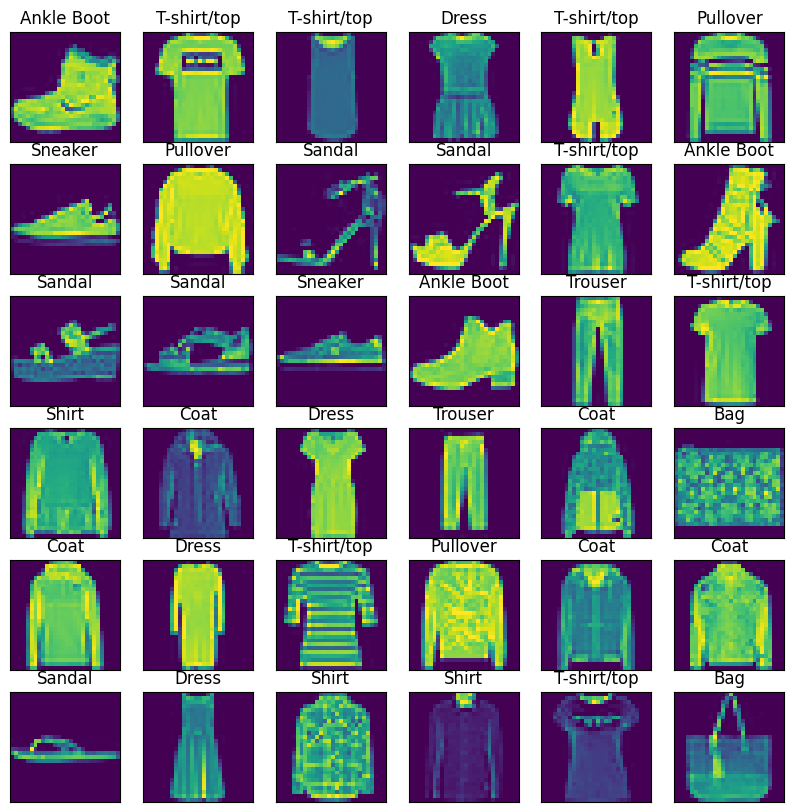

In [ ]:
#Create a dictionary for each type of label
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal',
          6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

plt.figure(figsize=(10, 10))
for i in range(36):
  plt.subplot(6,6, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
  label_index = train_labels[i]
  plt.title(labels[label_index])
plt.show()

## 🧾 5. One-Hot Encode Labels

Convert the integer labels (0–9) into one-hot encoded vectors to prepare them for multi-class classification with softmax.


In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

## 🏗️ 6. Define the CNN Architecture

Build a convolutional neural network (CNN) using the Keras `Sequential` API. This model includes:
- Three convolutional blocks with increasing filters (32 → 64 → 128)
- Batch normalization and dropout
- One dense hidden layer with ReLU activation
- Output layer with softmax for 10-class classification
- Optional L2 regularization


In [ ]:
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
    l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

    if l2 is not None: print('Using L2 regularization %.6f' % l2_loss_lambda)

    model = Sequential([
        #CONV => RELU => POOL
        Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',
               kernel_regularizer=l2, input_shape = input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.15),

        #CONV => RELU => POOL
        Conv2D(64, kernel_size=(3,3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        #CONV => RELU => POOL
        Conv2D(128, kernel_size=(3,3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Flatten(), #convert matrices to vectors
        Dropout(0.4),

        Dense(1024, activation='relu', kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512, activation='relu', kernel_regularizer=l2),
        Dropout(0.4),

        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

## ⚙️ 6. Compile the Model

We create an instance of our CNN model, specify a learning rate using the Adam optimizer, and compile the model using:
- `categorical_crossentropy` loss (for multi-class classification)
- `accuracy` as the evaluation metric
- `L2 regularization` is enabled to reduce overfitting.

In [ ]:
model = cnn_fmnist.build(input_shape = INPUT_SHAPE, classes=NUM_CLASSES, use_l2_reg=True)

adam = Adam(learning_rate=0.0001)

#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Using L2 regularization 0.000250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

## 🧮 7. Training Hyperparameters

Define key training hyperparameters:
- `BATCH_SIZE`: number of samples per gradient update
- `EPOCHS`: total passes through the dataset
- `VALIDATION_SPLIT`: percentage of training data used for validation


In [ ]:
BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2

## 🏋️ 8. Train the Model

We train the model on the training data using the `fit()` function and validate on 20% of the training set. The training history is stored for later visualization.


In [ ]:
history = model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.4156 - loss: 2.6028 - val_accuracy: 0.4282 - val_loss: 2.1013
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6962 - loss: 1.3003 - val_accuracy: 0.7790 - val_loss: 1.0574
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7341 - loss: 1.1738 - val_accuracy: 0.8104 - val_loss: 0.9635
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7650 - loss: 1.0894 - val_accuracy: 0.8273 - val_loss: 0.9128
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7871 - loss: 1.0210 - val_accuracy: 0.8351 - val_loss: 0.8818
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8040 - loss: 0.9718 - val_accuracy: 0.8488 - val_loss: 0.8470
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8164 - loss: 0.9360 - val_accuracy: 0.8536 - val_loss: 0.8182
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8257 - loss: 0.8994 - val_accuracy: 

## 🧪 9. Evaluate the Model

We evaluate the trained model on the test dataset and print the final accuracy. This helps us understand the model's generalization performance.


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9246 - loss: 0.3362
Test Accuracy:  0.9243999719619751


## 📊 10. Visualize Accuracy and Loss

We plot both training and validation loss/accuracy to analyze model performance over epochs and detect potential overfitting or underfitting.


Text(0.5, 1.0, 'Train - Accuracy')

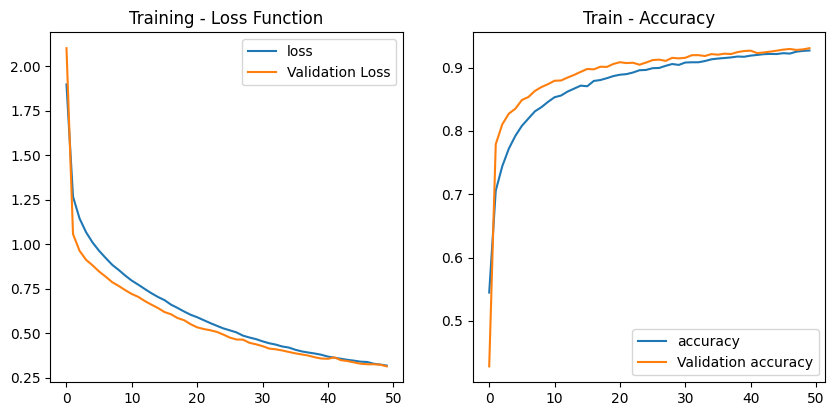

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.title('Train - Accuracy')

## 🔎 11. Make Predictions

We generate predictions on the test set using the trained model and convert one-hot encoded labels to integer class indices using `argmax()`.


In [ ]:
#get the predictions for the test data, convert to an integer value between 0 and 9
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis = 1)

#get the indices to be plotted
test_labels = np.argmax(test_labels, axis = 1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## 🖼️ 12. Visualize Correct and Incorrect Predictions

We display 20 correctly and 20 incorrectly classified test images.

- **Correct** predictions are shown in green colormap.
- **Incorrect** predictions are shown in red colormap, highlighting model weaknesses.


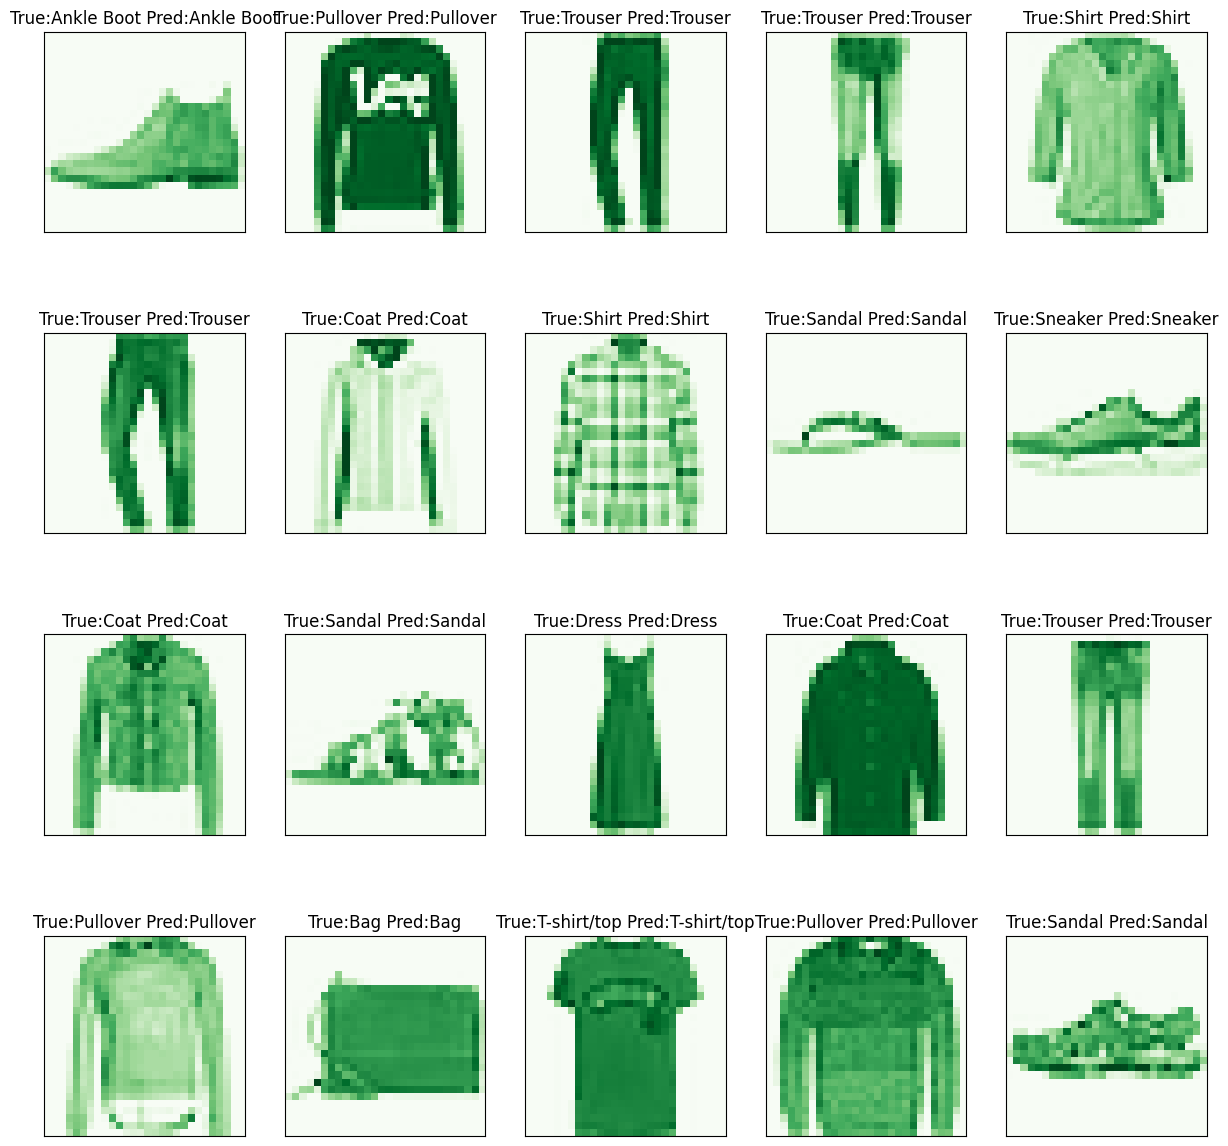

In [ ]:
plt.figure(figsize=(15, 15))
for i, indx in enumerate(correct[:20]):
  plt.subplot(4,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = 'Greens')
  label_index = train_labels[indx]
  plt.title('True:{} Pred:{}'.format(labels[test_labels[indx]], labels[predicted_classes[indx]]))
plt.show()

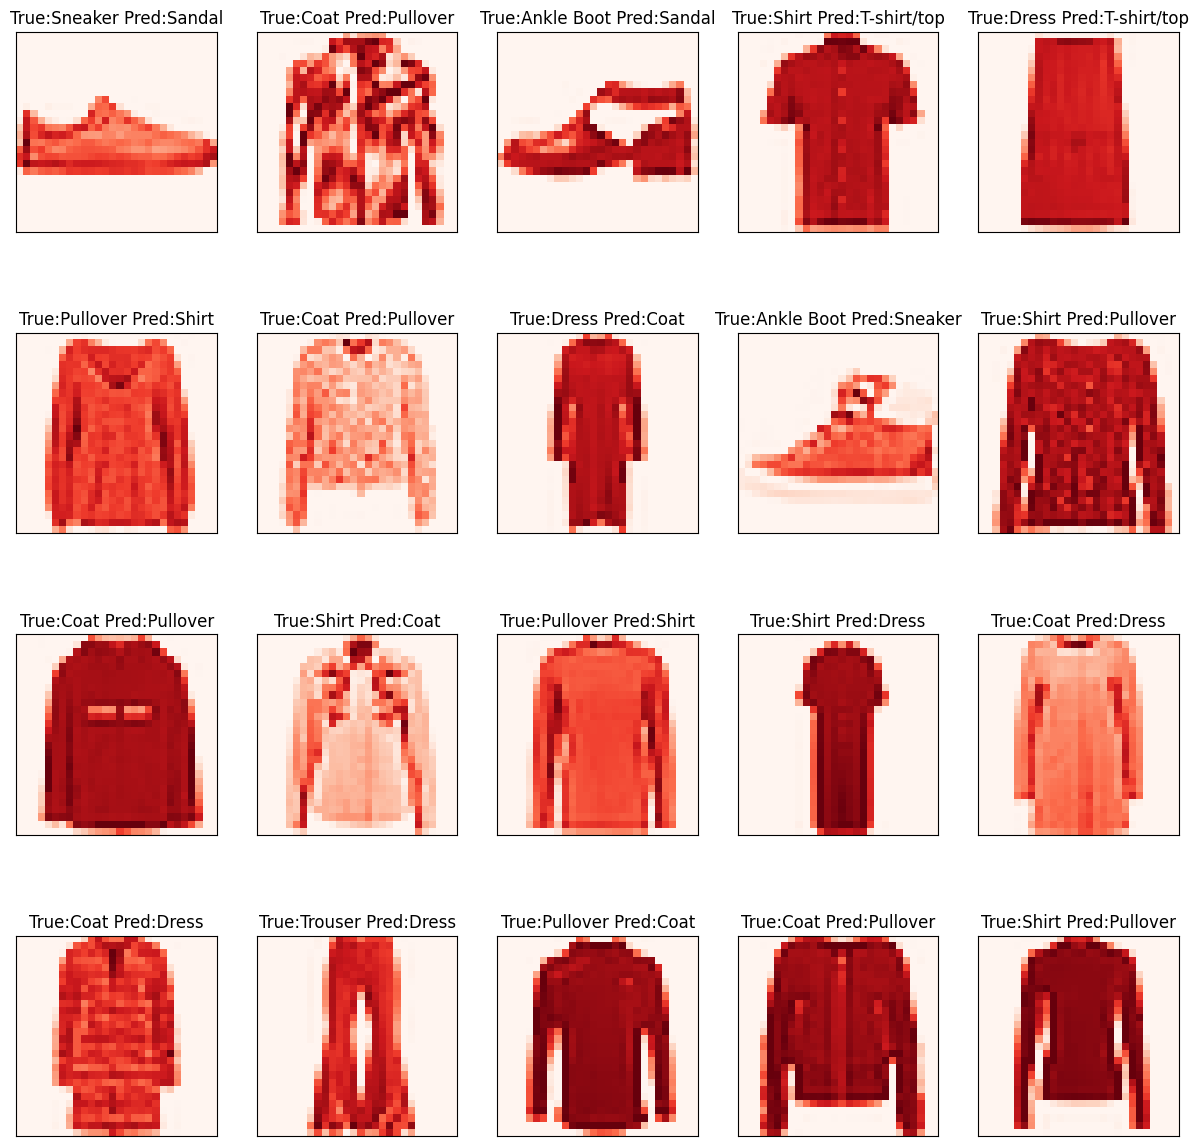

In [ ]:
plt.figure(figsize=(15, 15))
for i, indx in enumerate(incorrect[:20]):
  plt.subplot(4,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = 'Reds')
  label_index = train_labels[indx]
  plt.title('True:{} Pred:{}'.format(labels[test_labels[indx]], labels[predicted_classes[indx]]))
plt.show()